# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('exch_rates.csv')
er_ts = data
er_ts['Frequency']=pd.to_datetime(er_ts.Frequency, format='%Y-%m-%d')
er_ts.set_index('Frequency', inplace=True)
er_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6905 entries, 2000-01-01 to 2018-11-26
Data columns (total 3 columns):
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3)
memory usage: 215.8 KB


In [3]:
er_ts.dropna(inplace=True)
er_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4838 entries, 2000-01-03 to 2018-11-26
Data columns (total 3 columns):
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3)
memory usage: 151.2 KB


Plot the three exchange rates in one plot

Text(0.5, 1.0, 'Exchange Rate with US Dollar Over Time')

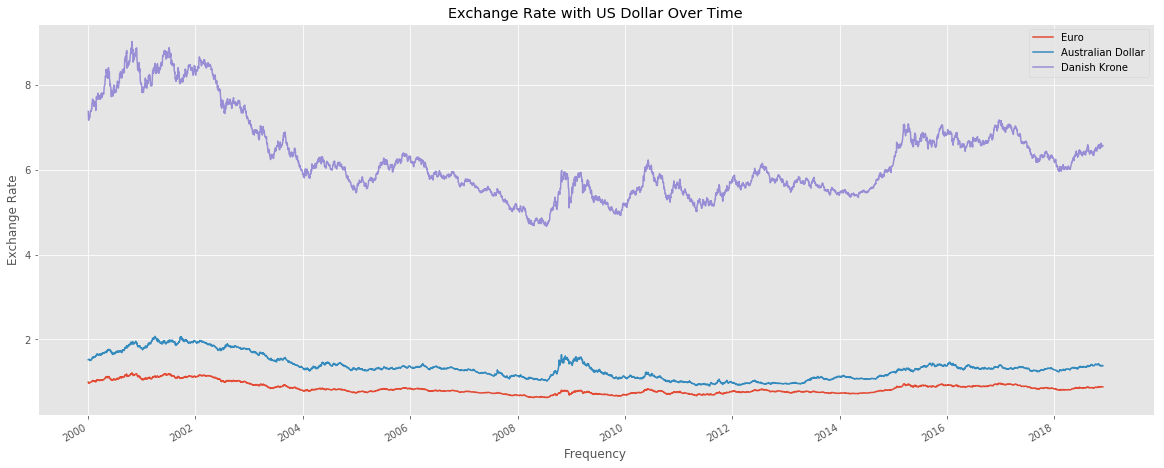

In [4]:
plt.style.use('ggplot')
er_ts.plot(figsize=(20, 8), subplots=False)
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate with US Dollar Over Time')

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [5]:
er_ts.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.
All trends are highly correlated, but the Krone is almost perfectly correlated with the Euro. This makes sense because the Krone is pegged to theEuro.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a859f28>,
      dtype=object)

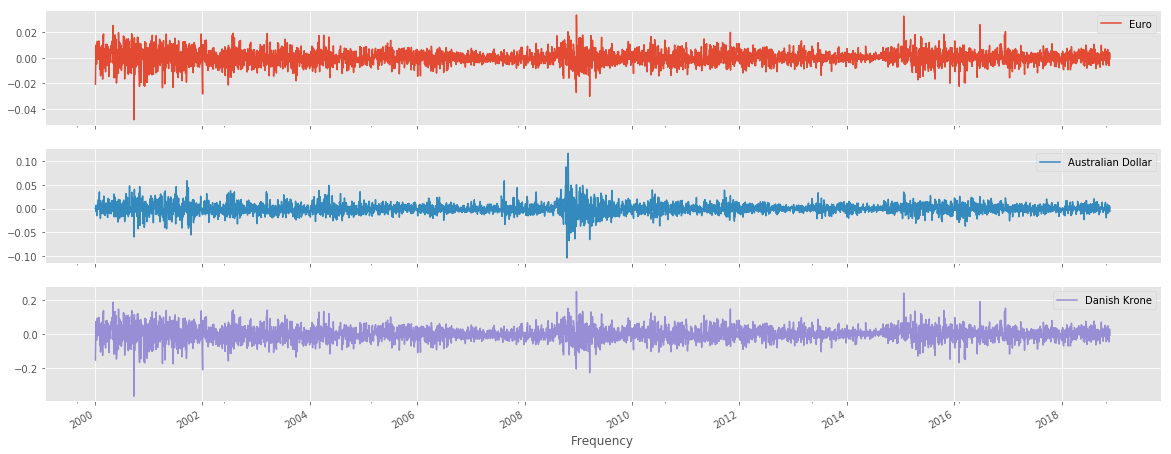

In [6]:
er_ts.diff().plot(figsize=(20, 8), subplots=True)

In [7]:
er_ts.diff().corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.551734,0.999688
Australian Dollar,0.551734,1.000000,0.551566
Danish Krone,0.999688,0.551566,1.000000


### Explain what's going on

After removing the trend by differencing, we can get a clearer picture of the changes between the AUS Dollar and the Euro/Krone, but the Krone and Euro remain highly correlated.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [8]:
euro = er_ts['Euro']
euro_lag1 = euro.shift(periods=1)
lag = pd.concat([euro, euro_lag1], axis=1)
lag.head()

,Euro,Euro
Frequency,,
2000-01-03,0.991080,NaN
2000-01-04,0.970403,0.991080
2000-01-05,0.964506,0.970403
2000-01-06,0.962649,0.964506
2000-01-07,0.972384,0.962649


In [9]:
lag.corr()

,Euro,Euro
Euro,1.000000,0.999119
Euro,0.999119,1.000000


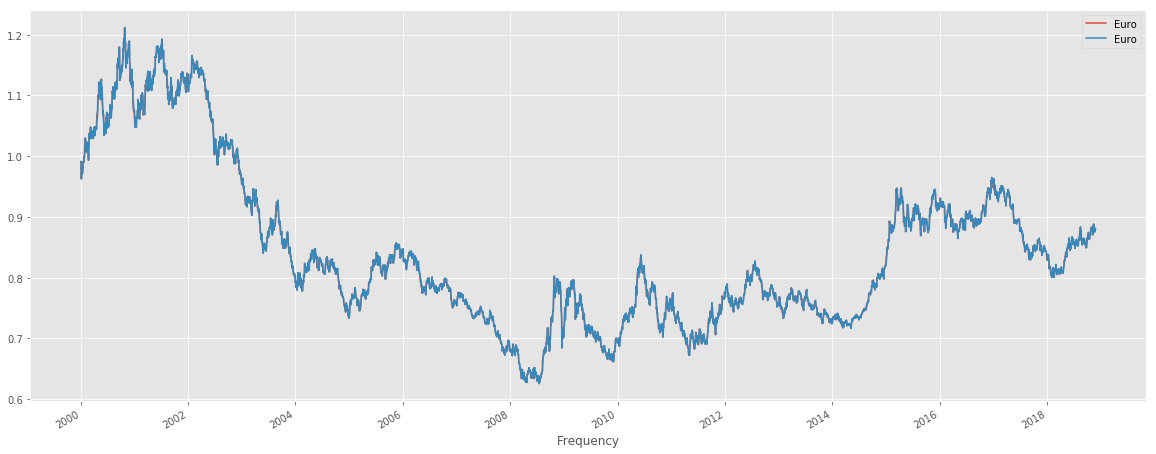

In [10]:
fs = (20, 8)
lag.plot(figsize=fs)

Repeat this, but for a "lag 5 autocorrelation"

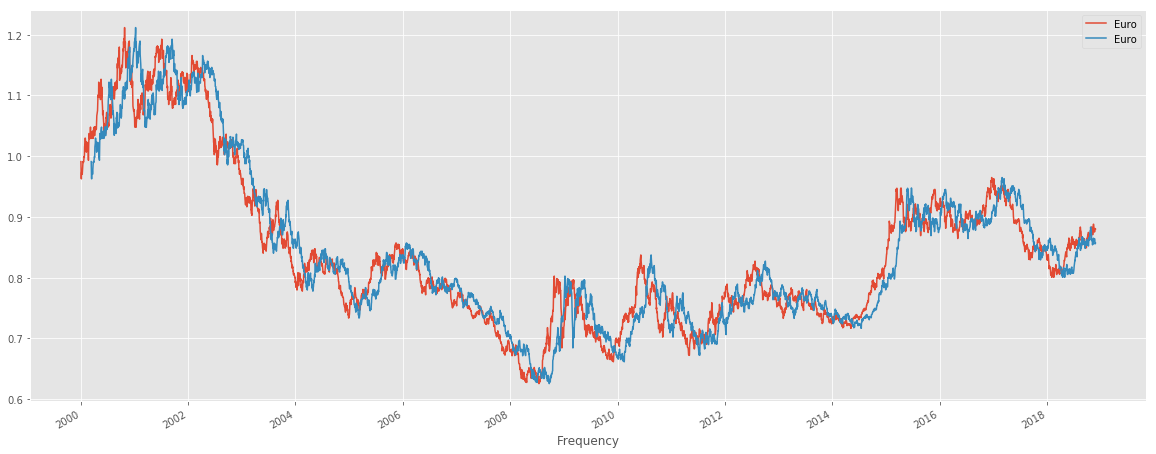

In [11]:
euro_lag50=euro.shift(periods=50)
lag50 = pd.concat([euro, euro_lag50], axis=1)
lag50.plot(figsize=fs)

In [12]:
lag50.corr()

,Euro,Euro
Euro,1.000000,0.955217
Euro,0.955217,1.000000


### What's your conclusion here?

Lags are highly correllated.

Knowing this, let's plot the ACF now.

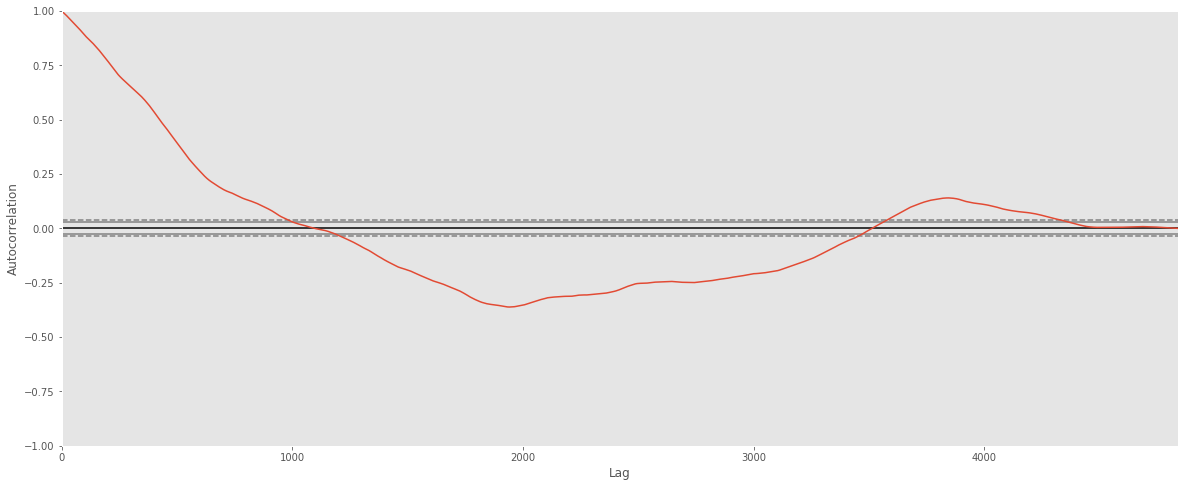

In [13]:
plt.figure(figsize=fs)
pd.plotting.autocorrelation_plot(euro)

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

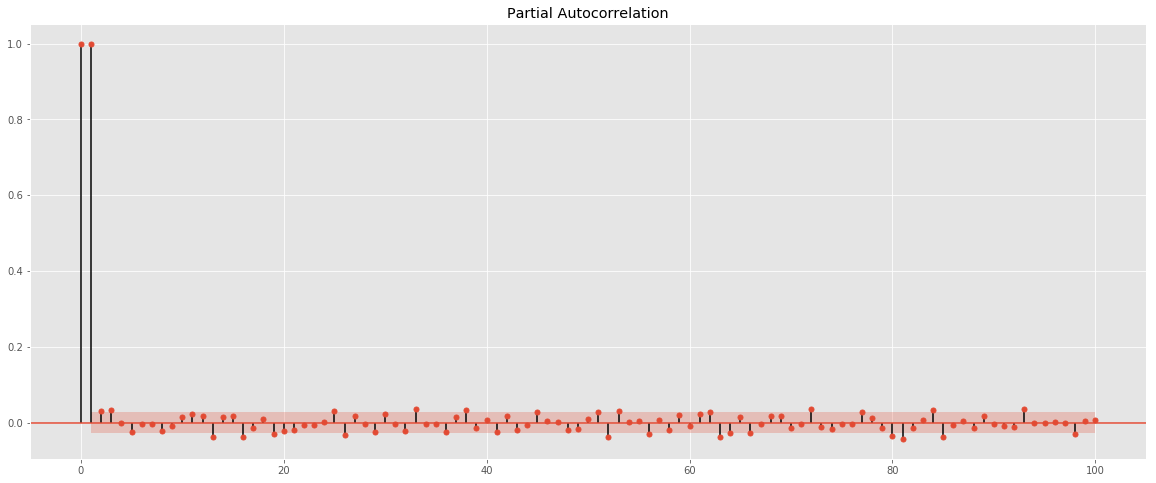

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 8

plot_pacf(euro, lags=100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [15]:
passengers = pd.read_csv('passengers.csv')
passengers['Month'] = pd.to_datetime(passengers.Month, format='%Y-%m-%d')
passengers.set_index('Month', inplace=True)
passengers.head(5), passengers.index

(            #Passengers
 Month                  
 1949-01-01          112
 1949-02-01          118
 1949-03-01          132
 1949-04-01          129
 1949-05-01          121,
 DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
                '1949-09-01', '1949-10-01',
                ...
                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
                '1960-11-01', '1960-12-01'],
               dtype='datetime64[ns]', name='Month', length=144, freq=None))

Text(0, 0.5, 'Number of Passengers')

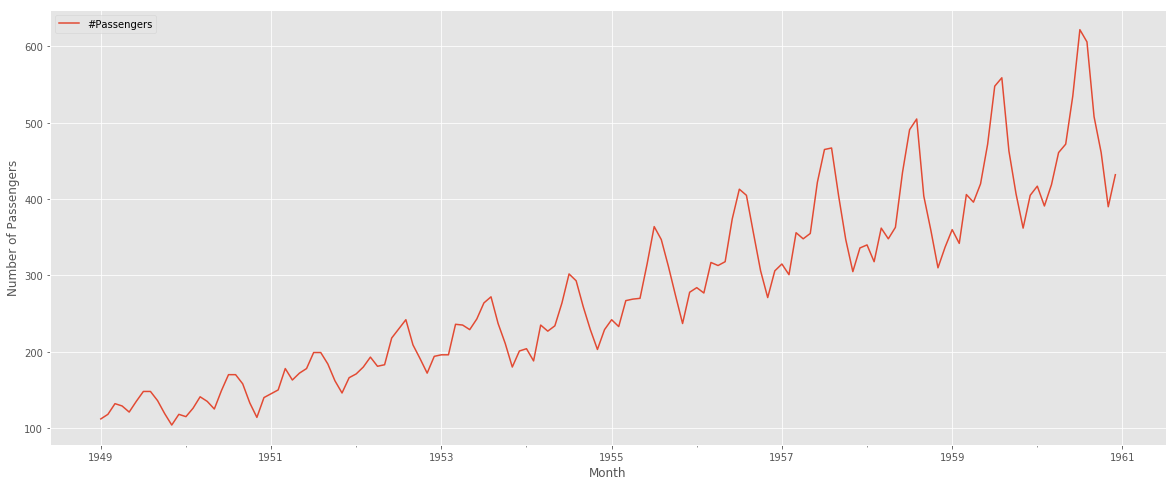

In [16]:
passengers.plot(figsize=fs)
plt.ylabel('Number of Passengers')

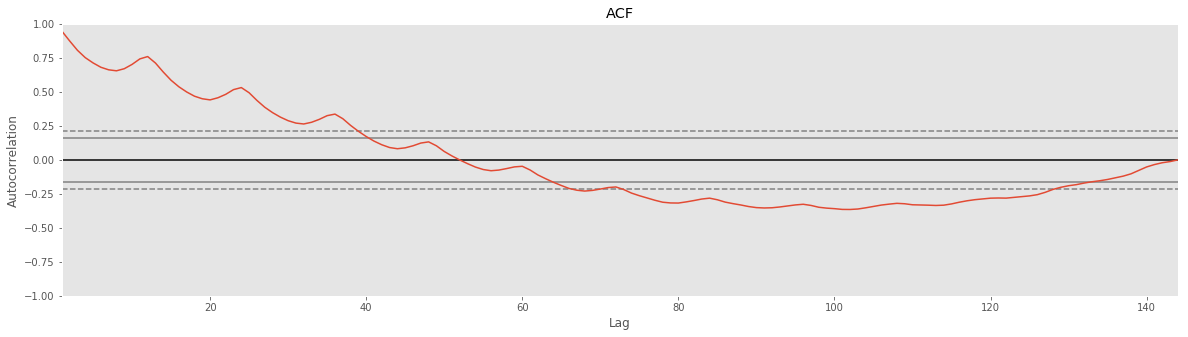

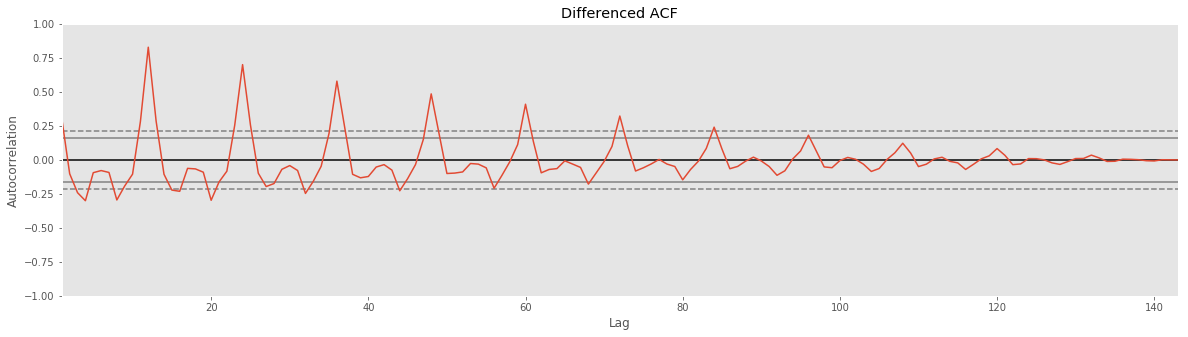

In [41]:
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(passengers)
plt.title('ACF');

plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(passengers.diff(periods=1).dropna())
plt.title('Differenced ACF');

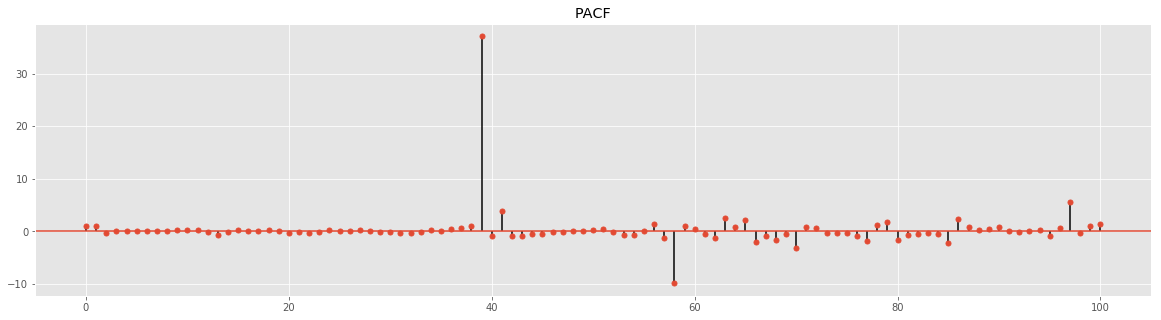

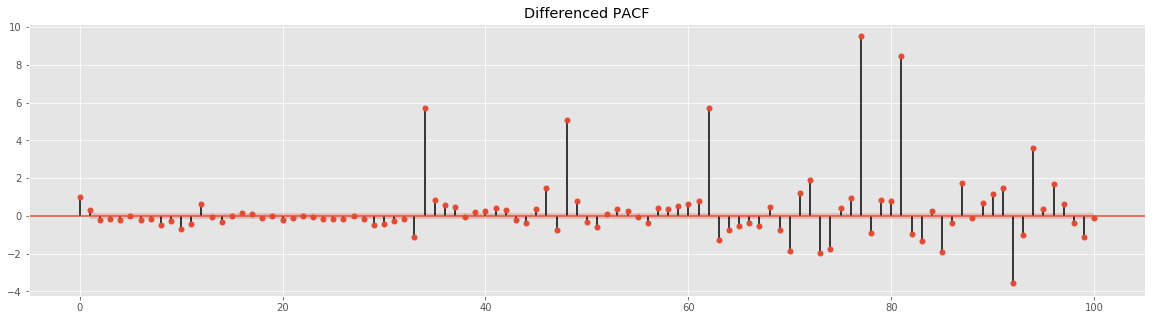

In [43]:
rcParams['figure.figsize'] = 20, 5
plot_pacf(passengers, lags=100)
plt.title('PACF');

rcParams['figure.figsize'] = 20, 5
plot_pacf(passengers.diff(periods=1).dropna(), lags=100)
plt.title('Differenced PACF');

### Your conclusion here

It is much easier to see the autocorrelation in differenced plots

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [47]:
nyse = pd.read_csv('NYSE_monthly.csv')
nyse['Month'] = pd.to_datetime(nyse.Month, format='%Y-%m')
nyse.set_index('Month', inplace=True)
nyse.head(15)

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042
1961-06-01,-0.042
1961-07-01,0.011
1961-08-01,0.021
1961-09-01,-0.030


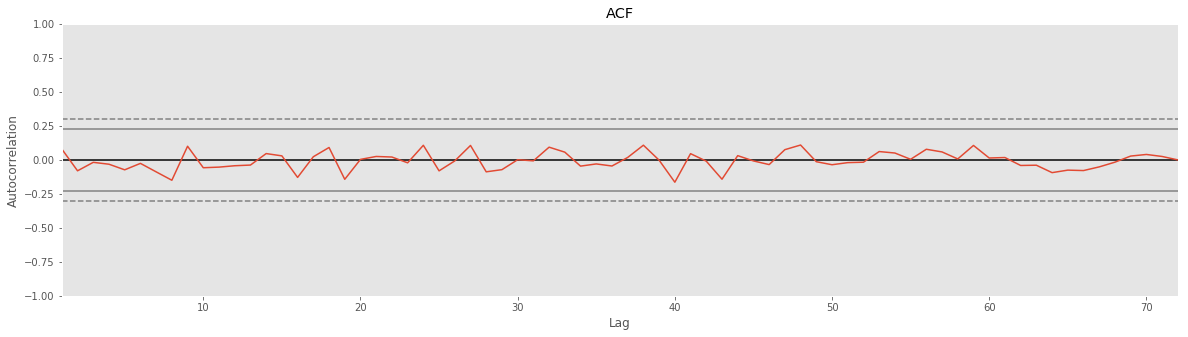

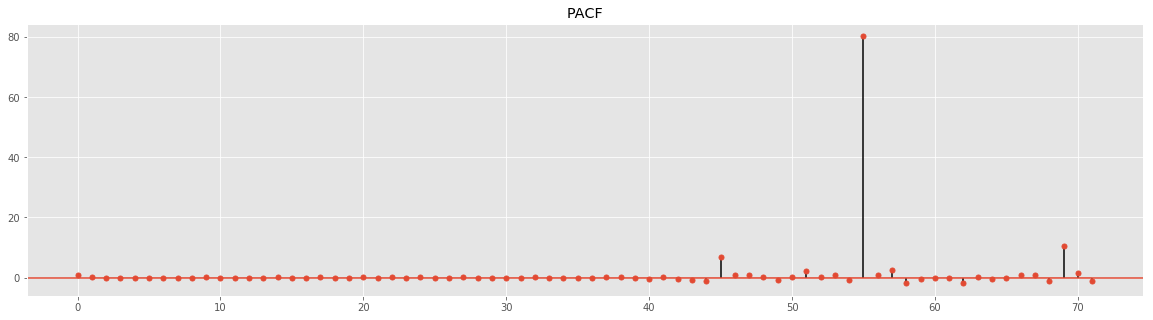

In [51]:
pd.plotting.autocorrelation_plot(nyse)
plt.title('ACF');

rcParams['figure.figsize'] = 20, 5
plot_pacf(nyse, lags=100)
plt.title('PACF');

## Your conclusion here

No clear indication of seasonality or autocorrelation with the NYSE.



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!